## Regression

* X = Independent Variable
* Y = Dependent Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Scikit- Learn

scikit-learn is a free and open-source machine learning library
* Simple and efficient tools for predictive data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable

Installation
* pip install scikit-learn

In [2]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
sal_df = pd.read_csv("Salary_Data.csv")

In [4]:
sal_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
sal_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
sal_df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
sal_df.sample(5) #display random rows

,YearsExperience,Salary
15,4.9,67938.0
5,2.9,56642.0
16,5.1,66029.0
14,4.5,61111.0
2,1.5,37731.0


In [8]:
sal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [9]:
sal_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\huma\AppData\Local\Temp\ipykernel_28748\3798000711.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal_df['Salary'])


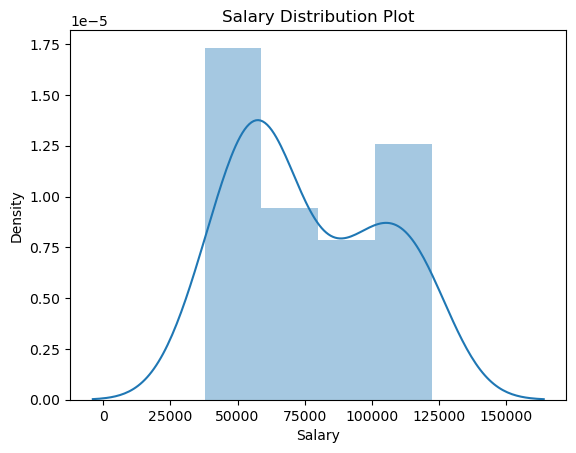

In [10]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(sal_df['Salary'])
plt.show()

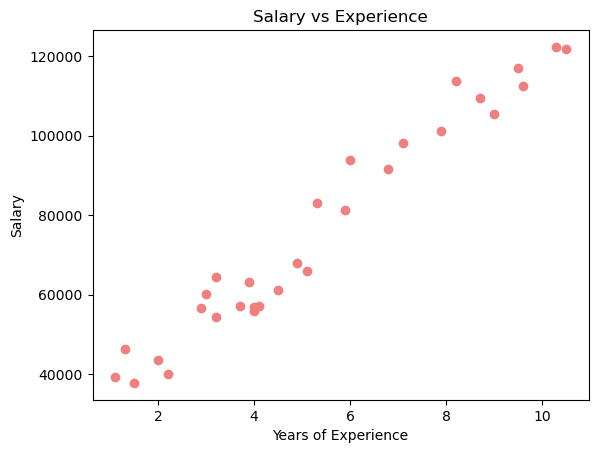

In [11]:
# Relationship between Salary and Experience
plt.scatter(sal_df['YearsExperience'], sal_df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
#plt.box(False)
plt.show()

In [12]:
X = sal_df.iloc[:, :1]  # independent
y = sal_df.iloc[:, 1:]  # dependent

In [13]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [14]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


## Data As Numpy Array

In [15]:
#sal_df.YearsExperience.values

In [16]:
#sal_df.Salary.values

## Split data in input and Output

In [17]:
#X = sal_df.YearsExperience.values  # independent variable
#Y = sal_df.Salary.values           # Dependent variable

#print(len(X))
#print(len(Y))

In [18]:
#print(X[0])
#print(Y[0])

##  train_test_split

#### The train_test_split function is a powerful tool in Scikit-learn's arsenal, primarily used to divide datasets into training and testing subsets. This function is part of the sklearn.

### test_size 
 is the number that defines the size of the test set. It’s very similar to train_size. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

#### Given two arrays, like x and y here, train_test_split() performs the split and returns four arrays (in this case NumPy arrays) in this order:

1. x_train: The training part of the first array (x)
2. x_test: The test part of the first array (x)
3. y_train: The training part of the second array (y)
4. y_test: The test part of the second array (y)


In [19]:
train_test_split(X, y, test_size = 0.2, random_state = 40)

[    YearsExperience
 20              6.8
 3               2.0
 29             10.5
 21              7.1
 11              4.0
 4               2.2
 8               3.2
 17              5.3
 26              9.5
 22              7.9
 0               1.1
 9               3.7
 10              3.9
 23              8.2
 28             10.3
 12              4.0
 1               1.3
 18              5.9
 25              9.0
 24              8.7
 5               2.9
 7               3.2
 27              9.6
 6               3.0,
     YearsExperience
 2               1.5
 16              5.1
 19              6.0
 14              4.5
 15              4.9
 13              4.1,
       Salary
 20   91738.0
 3    43525.0
 29  121872.0
 21   98273.0
 11   55794.0
 4    39891.0
 8    64445.0
 17   83088.0
 26  116969.0
 22  101302.0
 0    39343.0
 9    57189.0
 10   63218.0
 23  113812.0
 28  122391.0
 12   56957.0
 1    46205.0
 18   81363.0
 25  105582.0
 24  109431.0
 5    56642.0
 7    54445.0
 27 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

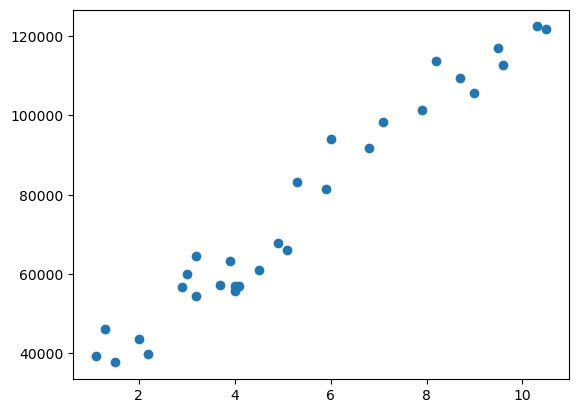

In [21]:
plt.scatter(X,y)

## Line Function

 Y = MX +C
* Algo try to find M, C

## sns.lmplot()
### to plot data and draw regression model fits across grids where multiple plots can be plotted

C:\Users\huma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


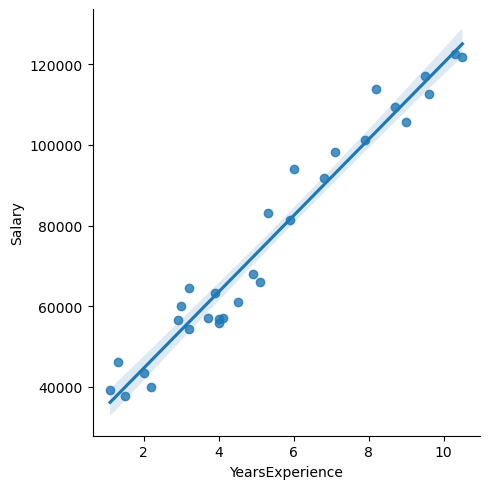

In [22]:
sns.lmplot(x= "YearsExperience",y = "Salary",data = sal_df)

In [23]:
reg = linear_model.LinearRegression()

## Using Fit Method to Train the Model

the fit method takes in a dataset (typically represented as a 2D array or matrix) and a set of labels, and then fits the model to the data. The fit method is used to train a wide range of machine learning models, including linear regression, logistic regression, decision trees, and more

In [24]:
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
Y_pred_test = reg.predict(X_test) 
Y_pred_test

array([[118089.93637913],
       [ 64197.94171484],
       [ 74783.86923818],
       [112315.79409367],
       [ 40139.01552542],
       [ 54574.37123907]])

In [26]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([[ 61310.87057211],
       [ 53612.01419149],
       [126751.14980732],
       [ 91143.93904698],
       [109428.72295094],
       [ 56499.08533422],
       [101729.86657033],
       [ 83445.08266637],
       [ 56499.08533422],
       [104616.93771306],
       [124826.43571217],
       [ 76708.58333333],
       [ 38214.30143027],
       [ 64197.94171484],
       [ 94031.01018971],
       [117127.57933155],
       [ 72859.15514303],
       [ 36289.58733511],
       [ 69009.72695272],
       [ 82482.72561879],
       [ 63235.58466726],
       [ 65160.29876241],
       [ 44950.8007633 ],
       [ 46875.51485846]])

In [27]:
#sns.lmplot(x= "YearsExperience",y = "Salary",data = sal_df)

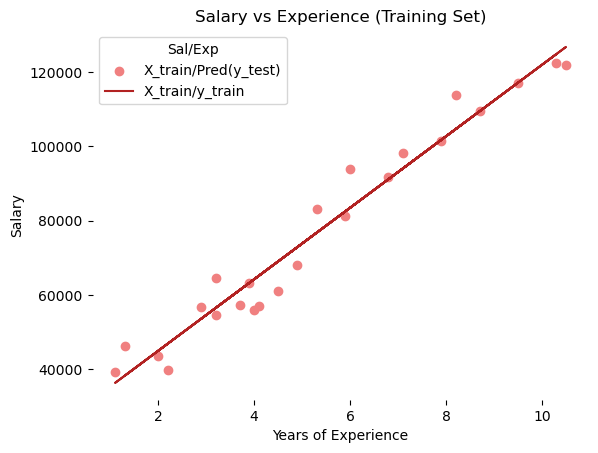

In [28]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [29]:
#reg.fit(sal_df[["YearsExperience"]],sal_df["Salary"])

## Now the model is trained  for prediction

In [30]:
reg.predict([[9.6]])

C:\Users\huma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[118089.93637913]])

In [31]:
reg.predict([[15]])

C:\Users\huma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[170057.21694827]])

In [32]:
reg.predict([[3.2]])

C:\Users\huma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[56499.08533422]])

### Coefficient and Intercept

In [33]:
reg.coef_

array([[9623.57047577]])

In [34]:
reg.intercept_

array([25703.65981177])

## Validating our Model

### Linear Equation y = mx+c

### Salary = m* YearsExperience + c

###  Salary = 9346.52* 15 +267898.412
###  Salary = 


In [35]:
 mean_squared_error(X,y)

6502000509.35

In [36]:
 r2_score(X,y)

-835179265.8689985

In [37]:
print('MSE = ', mean_squared_error(y_test, Y_pred_test ))
print('R2 = ', r2_score(y_test, Y_pred_test ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, Y_pred_test )))

MSE =  40177576.823665835
R2 =  0.9445485105673396
RMSE =  6338.578454485346


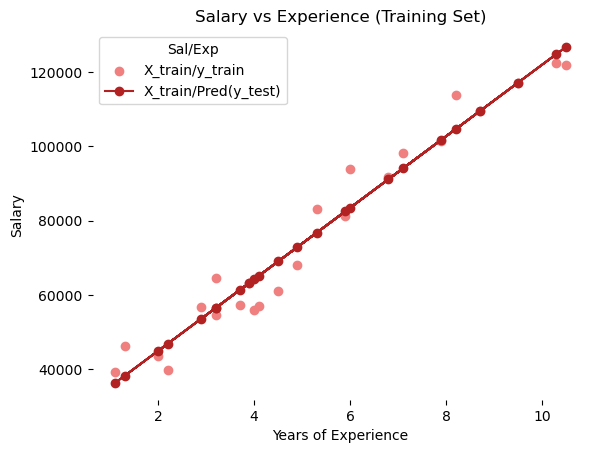

In [38]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, marker= "o" ,color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/y_train', 'X_train/Pred(y_test)'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

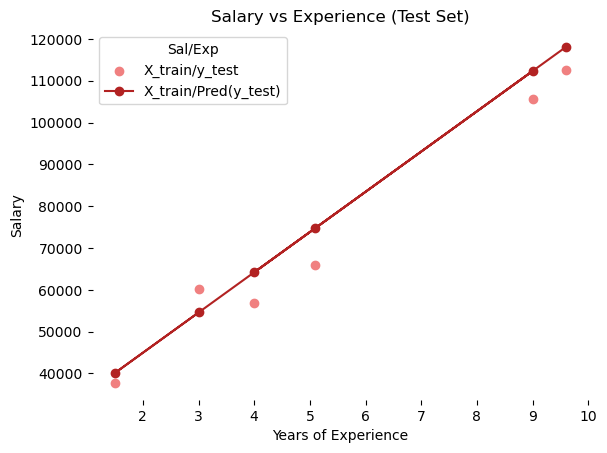

In [39]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_test, Y_pred_test, marker= "o" ,color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/y_test', 'X_train/Pred(y_test)'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [40]:
y_predict=reg.predict(X_test)
accuracy=r2_score(y_test,y_predict)
print("the accuracy = ",int(accuracy*100),"%")


the accuracy =  94 %
